## Checking Tensorflow

In [95]:
import tensorflow as tf
tf.__version__

'2.13.0'

## Importing all the required Libraries

In [96]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Reading the Data from the .csv File
-----Source: Prognostics Center of Excellence at Ames Research
Center, NASA

In [97]:
dataset = pd.read_csv('B0005.csv')
dataset = dataset.drop(labels=['SampleId'], axis=1)

In [98]:
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

Shape of DataFrame: (636, 6)
Cycle                      0.000000
Time Measured(Sec)      3690.234000
Voltage Measured(V)        2.475768
Current Measured          -2.009436
Temperature Measured      39.162987
Capacity(Ah)               2.035338
Name: 1, dtype: float64


In [99]:
dataset.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [100]:
data = dataset[~dataset.isin(['?'])]
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [101]:
data = data.dropna(axis=0)
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [102]:
print(data.shape)
print(data.dtypes)

(636, 6)
Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object


In [103]:
data.keys()
data.shape

(636, 6)

In [104]:
data = data.apply(pd.to_numeric)
data.dtypes

Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object

In [105]:
data.describe()

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,79.764151,3116.977701,3.297086,-0.171153,36.318064,1.581652
std,47.137103,242.197224,0.382406,0.556974,2.090171,0.198765
min,0.000000,2742.843000,1.813269,-2.012015,32.113473,1.153818
25%,39.000000,2891.996250,3.260587,-0.003576,34.639503,1.421123
50%,79.000000,3084.281000,3.397571,-0.001903,35.808964,1.559695
75%,119.000000,3311.828000,3.529257,-0.000338,38.447301,1.763486
max,167.000000,3690.234000,3.697170,0.009113,41.049942,2.035338


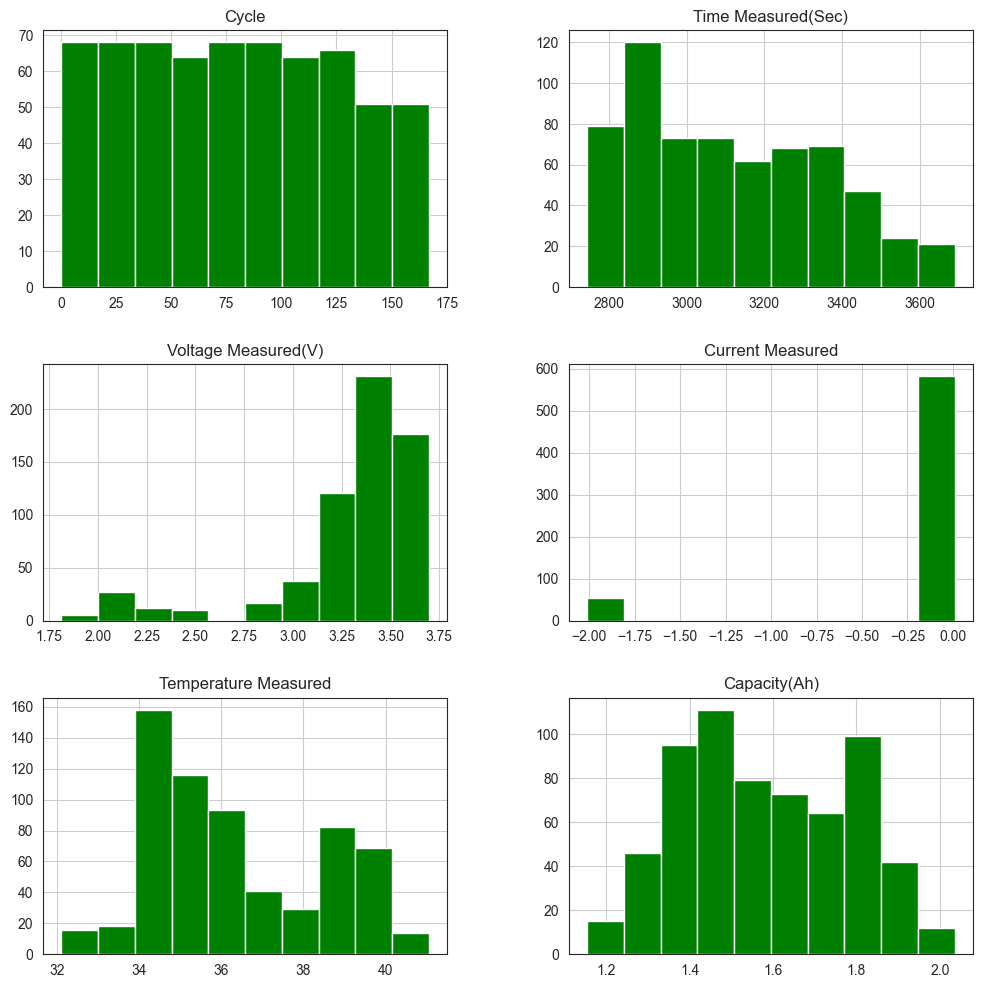

In [106]:
data.hist(figsize = (12, 12), color="green")
plt.show()

In [107]:
# features=["Voltage Measured(V)","Current Measured","Capacity(Ah)","Temperature Measured"]

features = ["Voltage Measured(V)", "Current Measured", "Temperature Measured"]  
target = "Capacity(Ah)"

In [108]:
# X = np.array(data.iloc[:,0:5].values)
# y = np.array(data.iloc[:,5].values)

X = data[features].values
y = data[target].values

In [109]:
print(X)

[[ 3.27716998e+00 -6.52835100e-03  3.42308528e+01]
 [ 2.47576776e+00 -2.00943589e+00  3.91629865e+01]
 [ 3.06211271e+00 -1.43329900e-03  3.73384785e+01]
 ...
 [ 3.58993739e+00 -5.83347000e-04  3.44059205e+01]
 [ 3.69180898e+00 -3.12712900e-03  3.21923241e+01]
 [ 3.38385665e+00 -9.84538000e-04  3.78516025e+01]]


In [110]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [111]:
mean, std

(array([ 3.29708625, -0.1711533 , 36.31806448]),
 array([0.38210518, 0.55653546, 2.08852755]))

In [112]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.3)

In [113]:
X_test.shape

(191, 3)

In [114]:
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(445, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [115]:
X_train[0]

array([0.0497592 , 0.30729039, 1.381131  ])

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(7, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(3,kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['mean_absolute_error','accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                60        
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 7)                 77        
                                                                 
 dropout_5 (Dropout)         (None, 7)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 24        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [117]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=1)

Epoch 1/10


ValueError: in user code:

    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 5), found shape=(1, 3)


In [ ]:
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.save("Parimal.h5")

d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['val_mean_absolute_error'])
# plt.title('MAE')
# plt.ylabel('mae')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Model accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'])
# plt.show()

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'])
# plt.show()

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# plot_df = data.loc[(data['Cycle']>=1),['Cycle','Capacity(Ah)']]
# sns.set_style("darkgrid")
# plt.figure(figsize=(12, 8))
# plt.plot(plot_df['Cycle'], plot_df['Capacity(Ah)'],color="green")
# #Draw threshold
# plt.plot([0.,len(data)], [1.4, 1.4])
# plt.ylabel('Capacity(Ah)')
# # make x-axis ticks legible
# adf = plt.gca().get_xaxis().get_major_formatter()
# plt.xlabel('Cycle')
# plt.title('RUL Prediction')

In [ ]:
# capacity = np.array(data.iloc[:,5].values)
# cycle = np.array(data.iloc[:,0].values)
# normalizedCycle = (cycle-min(cycle))/(max(cycle)-min(cycle))
# normalizedCapacity = (capacity-min(capacity)) / (max(capacity) - min(capacity))
# plt.plot(normalizedCapacity, color="green")
# plt.plot(normalizedCycle, color="green")
# plt.title('RUL Prediction')
# plt.ylabel('Capacity')
# plt.xlabel('Cycle')
# plt.show()
# plt.hist(normalizedCapacity, bins=10)
# plt.hist(normalizedCycle, bins=10)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig, ax1 = plt.subplots()
# sns.set_style("white")
# plot_df= data.loc[(data['Cycle']==1),['Temperature Measured','Current Measured']]
# #plt.plot([126, 127], color="black")
# plot_df1 = data.loc[(data['Cycle']==1),['Temperature Measured','Voltage Measured(V)']]

# color = 'tab:red'
# ax1.set_xlabel('Temperature Measured')
# ax1.set_ylabel('Voltage Measured(V)', color=color)
# ax1.plot(data['Time Measured(Sec)']/60, data['Voltage Measured(V)'], color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Current Measured', color=color)  # we already handled the x-label with ax1
# ax2.plot(data['Time Measured(Sec)']/60, data['Current Measured'],'-', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# fig.set_size_inches(10, 5)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()
# # vertical black line split the graph between charge and discharge operation.

In [ ]:
from tensorflow.keras.models import load_model

modelP = load_model("Parimal.h5")

